In [1]:
# uncomment the following lines if the required packages are not installed

#!pip3 install networkx
#!pip3 install fnss
#!pip3 install tqdm

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time

from tqdm.notebook import tqdm
from functions import *

plt.style.use('seaborn-whitegrid')

## Part #1


1. Use library scripts to generate $p-ER$ random graphs and $r-regular$ random graphs. Let $K$ denote the number of nodes

In [3]:
er_graph = generate_erdos_renyi_random_graph(k = 100, p = 0.1)

r_regular_graph = generate_r_regular_graph(k = 100, r = 8)    # k and r were chosen so that 3 <= r < k and k*r is even

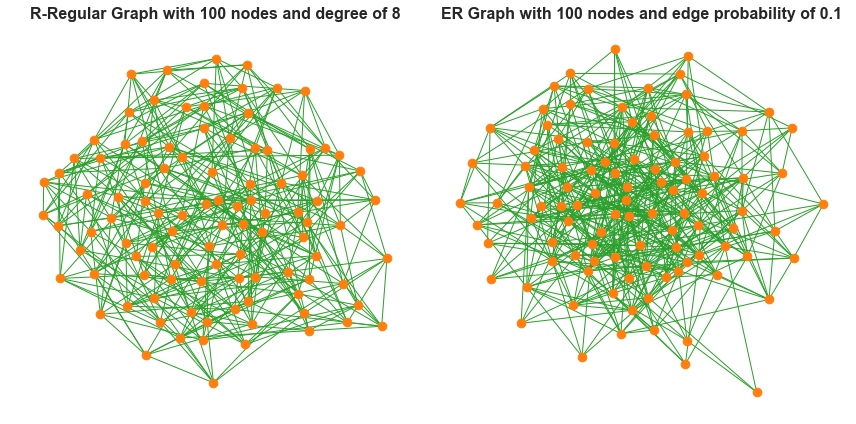

In [4]:
# convert a numpy graph to a networkx graph object
er_graph_nx = nx.Graph(er_graph)
r_regular_graph_nx = nx.Graph(r_regular_graph)


# Set node color and edge color
node_color = '#ff7f0e'
edge_color = '#2ca02c'

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Draw R-Regular Graph
ax1.set_title(f'R-Regular Graph with 100 nodes and degree of 8', fontsize=16, fontweight='bold')
nx.draw(r_regular_graph_nx, ax=ax1, node_size=75, node_color=node_color, edge_color=edge_color, with_labels=False)

# Draw ER Graph
ax2.set_title(f'ER Graph with 100 nodes and edge probability of 0.1', fontsize=16, fontweight='bold')
nx.draw(er_graph_nx, ax=ax2, node_size=75, node_color=node_color, edge_color=edge_color, with_labels=False)

# Add margins and tight layout
plt.subplots_adjust(wspace=0.3)
plt.margins(0.02)
fig.tight_layout()

# Display the plot
plt.show()

2. Write a script to check the connectivity of a given graph.
* Algebraic method 1 (irreducibility);
* Algebraic method 2 (eigenvalue of the Laplacian matrix);
* Breadth-first search algorithm.

In [5]:
er_graph_irreducibility_outcome = is_connected(er_graph, "Irreducibility")
r_regular_graph_irreducibility_outcome = is_connected(r_regular_graph, "Irreducibility")

print("The p-ER random graph " + er_graph_irreducibility_outcome)
print("The r-regular graph " + r_regular_graph_irreducibility_outcome)

The p-ER random graph is connected
The r-regular graph is connected


In [6]:
er_graph_eigenvalue_outcome = is_connected(er_graph, "Laplacian")
r_regular_graph_eigenvalue_outcome = is_connected(r_regular_graph, "Laplacian")

print("The p-ER random graph " + er_graph_eigenvalue_outcome)
print("The r-regular graph " + r_regular_graph_irreducibility_outcome)

The p-ER random graph is connected
The r-regular graph is connected


In [7]:
er_graph_bfs_outcome = is_connected(er_graph, "BFS")
r_regular_graph_bfs_outcome = is_connected(r_regular_graph, "BFS")

print("The p-ER random graph " + er_graph_bfs_outcome)
print("The r-regular graph " + r_regular_graph_bfs_outcome)

The p-ER random graph is connected
The r-regular graph is connected


3. Compare the complexity as a function of $K$ of the methods above by plotting curves of a complexity measure vs $K$

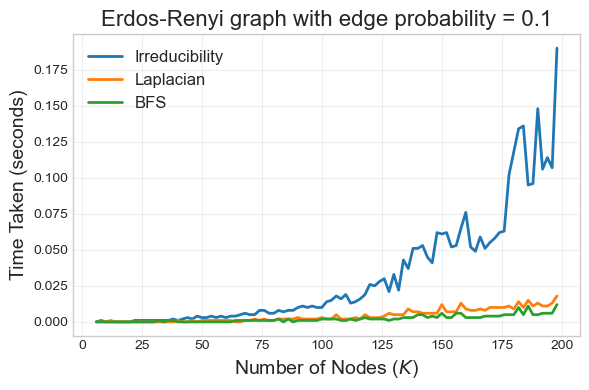

In [8]:
# Set the parameters
K_range = range(6, 200, 2)
p = 0.1

# Run the experiment
plot_runtime_complexity(K_range, p, generate_erdos_renyi_random_graph, "Erdos-Renyi", "edge probability")

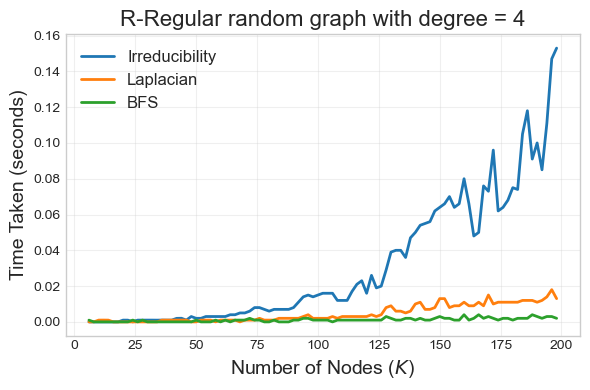

In [9]:
K_range = range(6, 200, 2)    # we insert a step of "2" so that n*r is even, as indicated in the challenge description 
r = 4

plot_runtime_complexity(K_range, r, generate_r_regular_graph, "R-Regular random", "degree")

Let $p_c(G)$ denote the probability that a graph $G$ is connected.
By running Monte Carlo simulations, estimate $p_c(G)$ and produce two curve plots:
* $p_c(G)$ vs. $p$ for Erdős–Rényi graphs with $K = 100$.

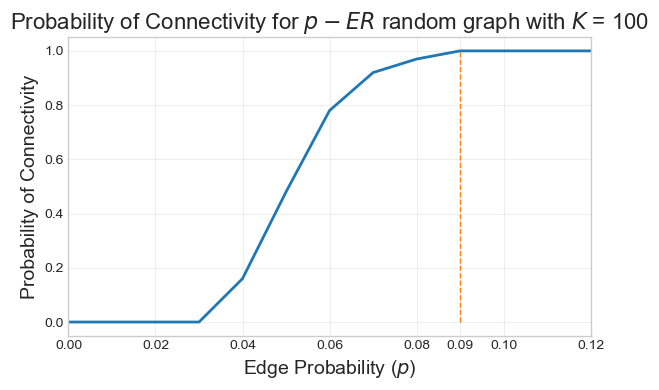

In [10]:
K = 100
p_range = np.linspace(0, 1, 101)
num_trials = 100

plot_estimated_p_connected_er(K, p_range, num_trials)

* $p_c(G)$ vs. $K$, for $K <= 100$, for r-regular random graphs with $r = 2$ and $r = 8$.

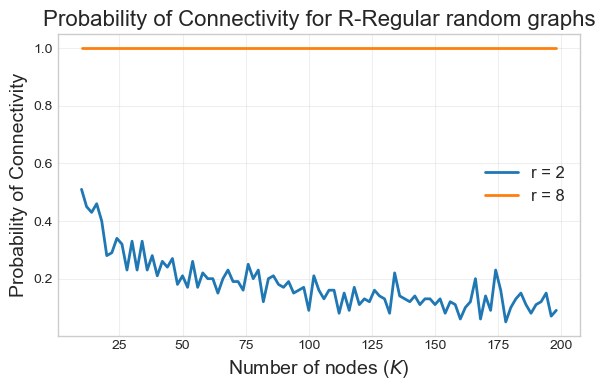

In [11]:
r1 = 2
r2 = 8
K_range = range(10, 200, 2)    # we insert a step of "2" so that n*r is even, as indicated in the challenge description 
num_trials = 100

plot_estimated_p_connected_r_regular(r1, r2, K_range, num_trials)

## Part #2

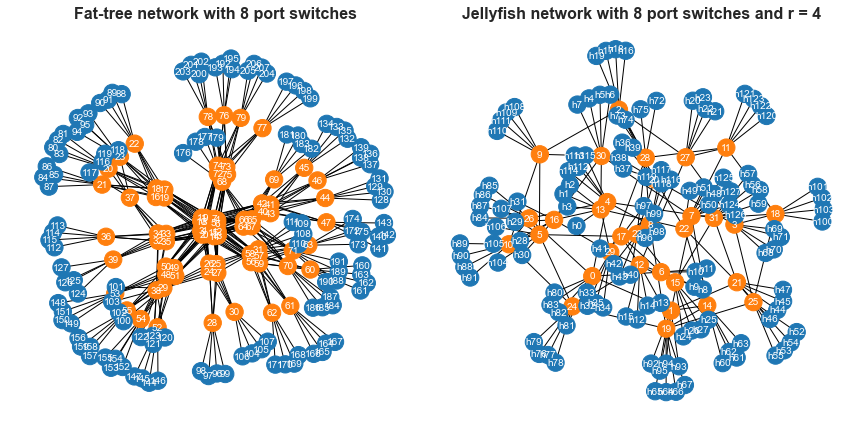

In [3]:
# test the code and generate an example fat-tree network, then plot it
ft = generate_fat_tree_topology(8)
# draw the network
color_map_ft = ['#1f77b4' if i[1] == 'host' else '#ff7f0e' for i in nx.get_node_attributes(ft,'type').items()]


# test the code and generate an example jellyfish network, then plot it
ports = 8
r = int(ports / 2)
num_servers = int((ports**3) / 4)
num_switches = int(num_servers / r)

jellyfish = generate_jellyfish_topology(num_servers, num_switches, r)


#draw the graphs
color_map_jf = ['#1f77b4' if i[1] == 'host' else '#ff7f0e' for i in nx.get_node_attributes(jellyfish,'type').items()]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Draw R-Regular Graph
ax1.set_title('Fat-tree network with 8 port switches', fontsize=16, fontweight='bold')
nx.draw(ft, ax=ax1, node_color=color_map_ft, with_labels=True, font_color = 'white', font_size = 10)

# Draw ER Graph
ax2.set_title('Jellyfish network with 8 port switches and r = 4', fontsize=16, fontweight='bold')
nx.draw(jellyfish, ax=ax2, node_color=color_map_jf, with_labels=True, font_color = 'white', font_size = 10)

# Add margins and tight layout
plt.subplots_adjust(wspace=0.3)
plt.margins(0.02)
fig.tight_layout()

# Display the plot
plt.show()

In [4]:
# Initialize parameters

n = 64    # number of pods
N = 10000    # number of servers for distributed computing
tau = 0.5 * 10**-6    # latency, 0.5 microseconds converted into seconds
E_x = 28800    # mean of X, 8 hours converted into seconds
T_0 = 30    # fixed set-up time, 30 seconds 
C = 10    # capacity of each link of the DC network, in Gbit/s
xi = 0.1    # server time sum multiplier
L_f = 4 * 8000    # size of the file to be processed, converted into Gbit
L_o = 4 * 8000    # size of the data returned by the job, converted into Gbit
f = 48/1500    # overhead fraction

R_baseline = T_0 + E_x    # 8 hours and 30 seconds, T_0 + E[X], in seconds
S_baseline = T_0 + E_x + xi * (T_0 + E_x)

Below we create a fat-tree network following the assignment indications:

In [5]:
fat_tree = generate_fat_tree_topology(n)

# select a server in our network to be A
A = np.random.choice([node for node in fat_tree.nodes() if fat_tree.node[node]['type'] == 'host'])

Let's check if the fat-tree network is connected:

In [6]:
print(f'The fat-tree network is connected: {nx.is_connected(fat_tree)}')

The fat-tree network is connected: True


In [7]:
num_servers_fat_tree = len([i for i in nx.get_node_attributes(fat_tree, "type").values() if i == "host"])

print(f'The number of servers in our Fat-Tree network is: {num_servers_fat_tree}')

The number of servers in our Fat-Tree network is: 65536


To compute the mean response time $E[R]$ and $E[\theta]$ as a function of $N$ for the given system, we need to simulate the scenario for different values of $N$ and calculate the average response time and the average server time used to run the job over multiple runs.

In [8]:
upper_bound = N + 1

response_time_list_fat_tree = []
computation_sums_list_fat_tree = []

for i in tqdm(range(1, upper_bound)):
    # get the i closest servers to server A, along with their number of hops
    closest_hosts = get_closest_hosts_fat_tree(fat_tree, A, i)

    # calculate the the average throughput for each of the i servers, in Gbit/s
    average_throughputs = get_thetas(closest_hosts, tau, C)

    # compute the amount of time in seconds needed to transmit each data fraction to each server (overhead included)
    time_forth = ((L_f / i) / average_throughputs)
    
    cpt = []
    otp = []
    
    for s in range(500):
        # calculate the time each server needs to perform its share of the computation (in seconds)
        cpt.append(np.random.exponential(scale=E_x / i, size=i) + T_0)

        # calculate the amount of data produced by each server
        otp.append(np.random.uniform(0, ((2 * L_o) / i), i))

    # compute the average of the results obtained with the previous simulation
    avg_cpt = np.array([sum(x) / len(x) for x in zip(*cpt)])
    avg_opt = np.array([sum(x) / len(x) for x in zip(*otp)])
    
    # calculate the time in seconds needed to send each fraction of processed data back to server A (overhead included)
    time_back = ((avg_opt + (avg_opt * f)) / average_throughputs)
    
    # compute the mean for each server
    mrt = time_forth + avg_cpt + time_back
    
    response_time_list_fat_tree.append(np.max(mrt))
    computation_sums_list_fat_tree.append(np.sum(avg_cpt))

response_time_list_fat_tree = np.array(response_time_list_fat_tree)
job_running_costs_fat_tree = np.array(response_time_list_fat_tree) + np.array(computation_sums_list_fat_tree) * xi

  0%|          | 0/10000 [00:00<?, ?it/s]

We now create a jellyfish network, again following the assignment indications:

In [9]:
# create a large jellyfish network to conduct the actual experiment
ports = n
r = int(n / 2)
num_servers = int((n**3) / 4)
num_switches = int(num_servers / r)

jellyfish = generate_jellyfish_topology(num_servers, num_switches, r)

A = 'h' + str(np.random.choice([i for i in range(num_servers)]))

Let's check if also the jellyfish network is connected:

In [10]:
print(f'The jellyfish network is connected: {nx.is_connected(jellyfish)}')

The jellyfish network is connected: True


We now double check that the number of servers is the same in both our networks

In [11]:
num_servers_jellyfish = len([i for i in nx.get_node_attributes(jellyfish, "type").values() if i == 'host'])

print(f'The number of servers in our Jellyfish network is: {num_servers_jellyfish}')

The number of servers in our Jellyfish network is: 65536


For each value of 𝑁 from 1 to 10000, get at least 100 response times and 100 job running costs, then calculate their respective average. The 100 steps simulation is inside the "get_response_time_jellyfish" function.

In [12]:
upper_bound = N + 1

response_time_list_jellyfish = []
computation_sums_list_jellyfish = []

for i in tqdm(range(1, upper_bound)):
    # get the i closest servers to server A, along with their number of hops
    closest_hosts = get_closest_hosts_jellyfish(jellyfish, A, i)

    # calculate the the average throughput for each of the i servers, in Gbit/s
    average_throughputs = get_thetas(closest_hosts, tau, C)

    # compute the amount of time in seconds needed to transmit each data fraction to each server (overhead included)
    time_forth = ((L_f / i) / average_throughputs)
    
    cpt = []
    otp = []
    
    for s in range(500):
        # calculate the time each server needs to perform its share of the computation (in seconds)
        cpt.append(np.random.exponential(scale=E_x / i, size=i) + T_0)

        # calculate the amount of data produced by each server
        otp.append(np.random.uniform(0, ((2 * L_o) / i), i))

    # compute the average of the results obtained with the previous simulation
    avg_cpt = np.array([sum(x) / len(x) for x in zip(*cpt)])
    avg_opt = np.array([sum(x) / len(x) for x in zip(*otp)])
    
    # calculate the time in seconds needed to send each fraction of processed data back to server A (overhead included)
    time_back = ((avg_opt + (avg_opt * f)) / average_throughputs)
    
    # compute the mean for each server
    mrt = time_forth + avg_cpt + time_back

    response_time_list_jellyfish.append(np.max(mrt))
    computation_sums_list_jellyfish.append(np.sum(avg_cpt))

response_time_list_jellyfish = np.array(response_time_list_jellyfish)
job_running_costs_jellyfish = np.array(response_time_list_jellyfish) + np.array(computation_sums_list_jellyfish) * xi

  0%|          | 0/10000 [00:00<?, ?it/s]

Here is the plot to compare the mean response time of both graphs:

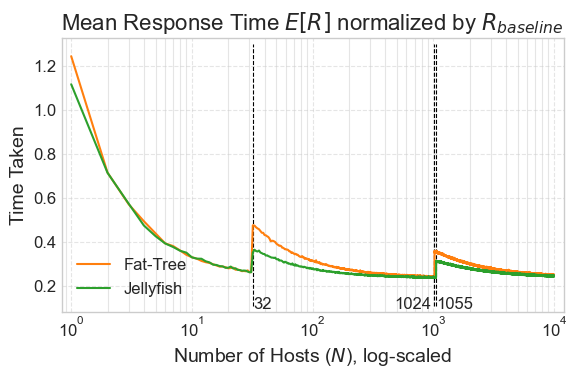

In [13]:
get_response_time_plot(response_time_list_fat_tree, response_time_list_jellyfish, R_baseline)

And here is the plot to compare the job running cost of both graphs:

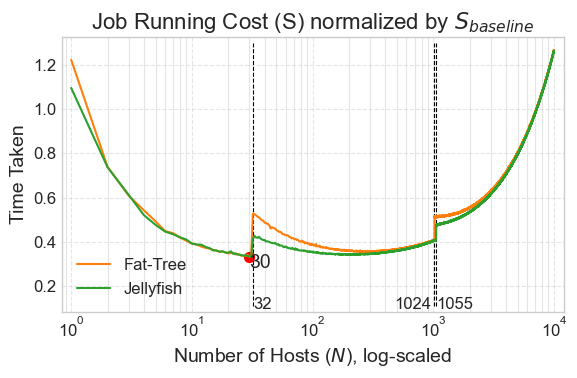

In [14]:
get_job_running_cost_plot(job_running_costs_fat_tree, job_running_costs_jellyfish, S_baseline)

In [15]:
print(f'The optimal number of servers in our Fat-Tree network is: {np.argmin(job_running_costs_fat_tree)}')

The optimal number of servers in our Fat-Tree network is: 30


In [16]:
print(f'The optimal number of servers in our Jellyfish network is: {np.argmin(job_running_costs_jellyfish)}')

The optimal number of servers in our Jellyfish network is: 30
